<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-и-объединение-их-в-один-датафрейм" data-toc-modified-id="Изучение-данных-и-объединение-их-в-один-датафрейм-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных и объединение их в один датафрейм</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Преобразование-типов-данных" data-toc-modified-id="Преобразование-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Преобразование типов данных</a></span></li><li><span><a href="#Устранение-пропусков-в-датафрейме" data-toc-modified-id="Устранение-пропусков-в-датафрейме-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Устранение пропусков в датафрейме</a></span></li><li><span><a href="#Изучение-дубликатов-в-датафрейме" data-toc-modified-id="Изучение-дубликатов-в-датафрейме-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изучение дубликатов в датафрейме</a></span></li><li><span><a href="#Изучение-категориальных-значений" data-toc-modified-id="Изучение-категориальных-значений-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Изучение категориальных значений</a></span></li><li><span><a href="#Проверка-количественных-значений" data-toc-modified-id="Проверка-количественных-значений-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Проверка количественных значений</a></span></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Исследование-фильмов,-получивших-государственную-поддержку" data-toc-modified-id="Исследование-фильмов,-получивших-государственную-поддержку-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование фильмов, получивших государственную поддержку</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.

Здача - изучить рынок российского кинопроката и выявить текущие тренды. Необходимо уделить внимание фильмам, которые получили государственную поддержку. В ходе анализа попробуем ответить на вопрос, насколько такие фильмы интересны зрителю.

Анализ основывается на данных, опубликованных на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

На первом этапе познакомимся с таблицей, посмотрим какие показатели имеются, с чем предстоит работать. Далее подготовим таблицу для анализа: избавимся от пропусков, дубликатов, аномальных значений, приведем таблицу к комфортному для анализа виду. Далее проведем исследовательский анализ картин. На последнем этапе исследуем фильмы, которые получили косударственную поддержку.


## Изучение данных и объединение их в один датафрейм 

In [1]:
# Импортируем библиотеку pandas
import pandas as pd

In [2]:
# чтение файла с данными и сохранение его в переменную df_1
try:
    df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    'Не удалось получить данные'

In [3]:
# Познакомимся с данными
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
# чтение файла с данными и сохранение его в переменную df_2
try:
    df_shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    'Не удалось получить данные'

In [5]:
# Познакомимся с данными
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Для анализа нам необходимо объединить таблицы, но общие колонки имеют раный тип данных. Приведем их общему типу.

In [6]:
df_movies['puNumber'] = pd.to_numeric(df_movies['puNumber'], errors='coerce') 
df_shows['puNumber'].astype(float)

0       111000113.0
1       111000115.0
2       111000116.0
3       111000117.0
4       111000118.0
           ...     
3153    224014814.0
3154    224021411.0
3155    224022410.0
3156    224023210.0
3157    224026410.0
Name: puNumber, Length: 3158, dtype: float64

Объединим две таблицы в одну общую.

In [7]:
df = df_movies.merge(df_shows, on='puNumber', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

В таблице всего 16 колонок 11 из которых принадлежат типу `object` и 5 типу `float64`.


In [8]:
# получение первых 10 строк таблицы df
df.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.0,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416.0,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.0,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.0,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013.0,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614.0,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416.0,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114.0,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


Согласно документации к данным:

* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма;
* `box_office` — сборы в рублях.

## Предобработка данных

### Преобразование типов данных

Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [9]:
df.dtypes

title                     object
puNumber                 float64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

- Колонка `puNumber`

Столбец хранит номера прокатных удостоверений, которые просто не могут иметь вид вещественного числа.

In [10]:
df = df.astype({'puNumber': 'Int64'})

Проверим результат.

In [11]:
df[['puNumber']].dtypes

puNumber    Int64
dtype: object

- Колонка `ratings`

Очевидно, что для данной колонки подходит тип данных `float`. Тот факт, что колонка относится к типу данных `object`, может свидетельствовать о наличии нестандартных значений. Посмотрим уникальные значения, встречающиеся в данном столбце.

In [12]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Значения в виде процентного числа сложно использовать для анализа. Нет возможности точно соотнести процентные и вещественные числа. Логичным видится удалить строки с процентными числами. 

In [13]:
df['ratings'].value_counts().sum() # Сохраним число значений, для дальнейшей проверки % удаленных данных.

6519

In [14]:
wrong_raiting = ['99%', '28%', '97%', '83%', '64%', '91%', '94%', '62%', '79%', '90%', '19%', '88%', '89%', '98%']
df = df.replace(wrong_raiting, 0)
df = df.loc[df['ratings'] != 0]

Удалено незначительное уоличество строк.

In [15]:
df['ratings'].value_counts().sum()

6490

Проверим уникальные значения столбца после преобразований.

In [16]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', '3.7', '1.4', '3.1', '3.5', '3.2',
       '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', '1.0',
       '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '8.9', '9.1'],
      dtype=object)

In [17]:
df['ratings'] = df['ratings'].astype(float)

Теперь присвоим значениям колонки корректный тип.

Проверим результат.

In [18]:
df['ratings'].dtypes

dtype('float64')

- Колонка `show_start_date`

Значения данного столбца приведем к типу `datetime`

In [19]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M')

In [20]:
df['show_start_date'].dtypes

datetime64[ns, UTC]

Посмотрим как выглядит таблица после преобразований.

In [21]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


### Устранение пропусков в датафрейме

Проанализируем таблицу на предмет пропусков.

В полученных данных лишь по части фильмов имеется информация об объеме собранных средств. Заполнить данные пропуски не представляется возможным, поэтому логичным видится использовать только те строки, в которых данная информация предоставлена. Мы поместили их в датафрейм `df` вместе с остальными данными. 

Фильмы, у которых в колонках  `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` есть значения, относятся к картинам, которым оказывалась государственная поддержка. Если в колонке присутствует пропуск, можно предположить, что финансовая помощь государством не оказывалась.

Остальные колонки c пропусками не используются для анализа, поэтому их пропущенные значения можно игнорировать. В этих колонках заменим пропуск на значение `нет данных`

In [61]:
coloumns_no_data = ['film_studio', 'production_country', 'director', 'producer', 'genres']
df[coloumns_no_data] = df[coloumns_no_data].fillna('нет данных')

Фильмы, у которых отсутствует информация о номере прокатного удостоверения корретно будет удалить. Таких строк всего 3.

In [62]:
df = df.dropna(subset=['puNumber']) 

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7437 entries, 0 to 7439
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   title                   7437 non-null   object             
 1   puNumber                7437 non-null   Int64              
 2   show_start_date         7437 non-null   datetime64[ns, UTC]
 3   type                    7437 non-null   object             
 4   film_studio             7437 non-null   object             
 5   production_country      7437 non-null   object             
 6   director                7437 non-null   object             
 7   producer                7437 non-null   object             
 8   age_restriction         7437 non-null   object             
 9   refundable_support      313 non-null    float64            
 10  nonrefundable_support   313 non-null    float64            
 11  budget                  313 non-null    flo

### Изучение дубликатов в датафрейме

Проверим данные на дубликаты. 

Ключевое значение играет колонка `title`, так как каждый представленный фильм, должен быть уникальным. Значения в других столбцах могут повторятся. 

Посмотрим, встречаются ли фильмы в таблице дважды.

In [23]:
df['puNumber'].value_counts()

221054410    2
221154310    2
121004813    1
121006117    1
121028616    1
            ..
121020412    1
121016318    1
121006019    1
124000117    1
126002916    1
Name: puNumber, Length: 7454, dtype: Int64

In [24]:
df.duplicated().sum() 

0

Количество полностью повторяющихся строк равно 0, тем не менее, строки в которых совпадает номер прокатного удостоверения, можно считать дубликатами, так как номер имеет уникальное значение

Удалим дубликаты, чтобы анализ был корректным.

In [25]:
df['puNumber'] = df['puNumber'].drop_duplicates() 

Отсутствие дубликатов среди названий фильмов также означает, что и в целом строк дублирующих друг друга в таблице нет, значит можно считать, что в целом в таблице отсутствуют дубликаты, которые могут оказать негативное влияние на анализе. Для дальнейшей работы приведем все индексы к корректному значению.

In [26]:
df = df.reset_index(drop=True)

In [27]:
df['puNumber'].value_counts()

122001411    1
121010215    1
124002316    1
126003213    1
111001616    1
            ..
131000315    1
121020412    1
121016318    1
121006019    1
126002916    1
Name: puNumber, Length: 7454, dtype: Int64

### Изучение категориальных значений

Посмотрим, есть ли проблемы в категориальных столбцах.

- Обратимся к колонке `type` и посмотрим уникальные значения.

In [28]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Заметим, что некоторые типы фильмов совпадают, но из-за пробела рассположенного перед названием, они дублируются, фильмы принадлежащие к одному типу, воспринимаются как принадлежащие разным. Избавимся от отступа в начале типа фильма.

In [29]:
df['type'] = df['type'].str.strip()

Проверим результат.

In [30]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

- Проверим колонку с возрастной категорией `age_restriction`

In [31]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Здесь все корректно.

Остальные столбцы с категориальными данными имеют схожие, проблемы, но их структурирование слишком трудоемко, к тому же не имеет принципиального значения. Поэтому логичным будет оставить данные в прежнем виде.

### Проверка количественных значений

Проверим, существуют ли в количественных столбцах аномальные данные.

Строки со значением 0 в колонке `budget` имеют положительное значение в колонках `refundable_support` и `nonrefundable_support`, что является аномалией (если есть возвращенные/невозвращенные средства, значит бюджет не может быть равным 0). Удалим эти строки, чтобы избежать искажения анализа.

In [32]:
df = df.loc[df.loc[:,'budget'] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7440 entries, 0 to 7456
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7440 non-null   object             
 1   puNumber               7437 non-null   Int64              
 2   show_start_date        7440 non-null   datetime64[ns, UTC]
 3   type                   7440 non-null   object             
 4   film_studio            7440 non-null   object             
 5   production_country     7440 non-null   object             
 6   director               7440 non-null   object             
 7   producer               7440 non-null   object             
 8   age_restriction        7440 non-null   object             
 9   refundable_support     313 non-null    float64            
 10  nonrefundable_support  313 non-null    float64            
 11  budget                 313 non-null    float64          

Приведем все индексы к корректному значению.

In [33]:
df = df.reset_index(drop=True)

### Добавление новых столбцов





- Создадим столбец `show_start_year` с информацией о годе проката. Выделим год из даты премьеры фильма.

In [34]:
df['show_start_year'] = df['show_start_date'].dt.year

In [35]:
df['show_start_year'].head()

0    2015
1    2016
2    2016
3    2016
4    2015
Name: show_start_year, dtype: int64

- Создадим два столбца: с именем и фамилией главного режиссёра (`main_director`) и основным жанром фильма (`main_genre`). В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

Создадим функцию, которая будет разделять значение по знаку запятой.

In [36]:
def get_first_value(row):
    splitted = row.split(',')
    return splitted[0]

Применим функцию к соответствующим столбцам.

In [37]:
df['main_genre'] = df['genres'].apply(get_first_value) 
df['main_director'] = df['director'].apply(get_first_value) 

Проверим получившийся результат.

In [38]:
df[['main_genre', 'main_director']].head()

,main_genre,main_director
0,боевик,Кевин Костнер
1,драма,Е.Матвеев
2,фантастика,Тимур Бекмамбетов
3,фантастика,Тимур Бекмамбетов
4,фантастика,Тимур Бекмамбетов


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

Чтобы определить общую сумму государственной поддержки следует сложить сумму возвратных и невозвратных средств. Получившееся значение разделим на общий бюджет фильма.

In [39]:
df['proportion_fund_source'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

Проверим результат.

In [40]:
df['proportion_fund_source'].tail()

7435   NaN
7436   NaN
7437   NaN
7438   NaN
7439   NaN
Name: proportion_fund_source, dtype: float64

## Исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год

In [41]:
df_years = df['show_start_year'].value_counts().to_frame()
df_years

,show_start_year
2010,984
2019,924
2018,884
2016,810
2014,805
2015,691
2013,629
2011,621
2012,591
2017,501


In [42]:
df_years['proportion_show_start_year'] = df_years['show_start_year'] / df_years['show_start_year'].sum()
df_years

,show_start_year,proportion_show_start_year
2010,984,0.132258
2019,924,0.124194
2018,884,0.118817
2016,810,0.108871
2014,805,0.108199
2015,691,0.092876
2013,629,0.084543
2011,621,0.083468
2012,591,0.079435
2017,501,0.067339


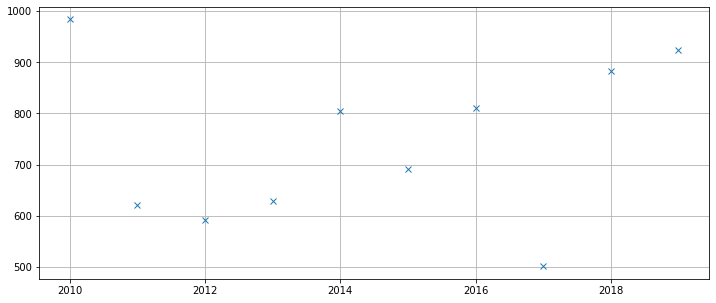

In [43]:
df_show_start_year = df['show_start_year'].value_counts()
df_show_start_year.plot(grid=True, style='x', figsize=(12, 5));

Можно отметить, что наибольшее количество фильмов выходило в прокат в 2019 году. В 2017 году наблюдалось некоторое падение количества фильмов выходивших в прокат, но в целом тренд направлен на увеличение.

- Изучим, как менялась динамика сборов по годам

In [44]:
box_office_pivot = df.pivot_table(index='show_start_year', values='box_office', aggfunc='sum').sort_values(by = 'box_office', 
                                                                                                           ascending = False) 
box_office_pivot

,box_office
show_start_year,
2018,4.925040e+10
2017,4.845811e+10
2019,4.827347e+10
2016,4.673894e+10
2015,3.799653e+10
2014,7.434714e+09
2013,2.979971e+07
2011,1.410276e+07
2012,6.953683e+06


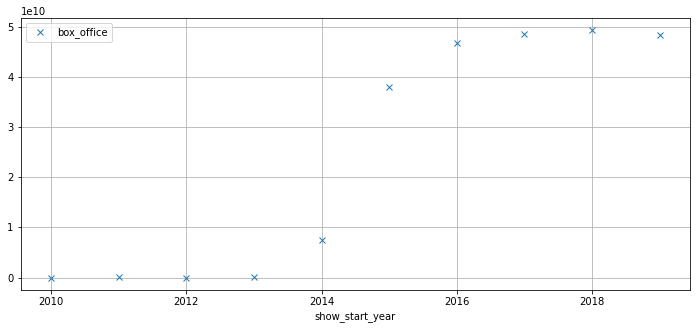

In [45]:
box_office_pivot.plot(grid=True, style='x', figsize=(12, 5));

Начиная с 2015 года происходит резкое увеличение сборов. Максимальное значение наблюдается в 2018 году, минимальное в 2010.

- Посчитаем среднюю и медианную сумму сборов для каждого года

In [46]:
box_office_med = df.pivot_table(index='show_start_year', values='box_office', aggfunc=['mean', 'median'])
box_office_med

,mean,median
,box_office,box_office
show_start_year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.475341e+04,5760.000
2013,1.619549e+05,3522.500
2014,2.684012e+07,18160.000
2015,8.369279e+07,4864744.050
2016,8.988258e+07,3846679.410
2017,1.368873e+08,9943877.500


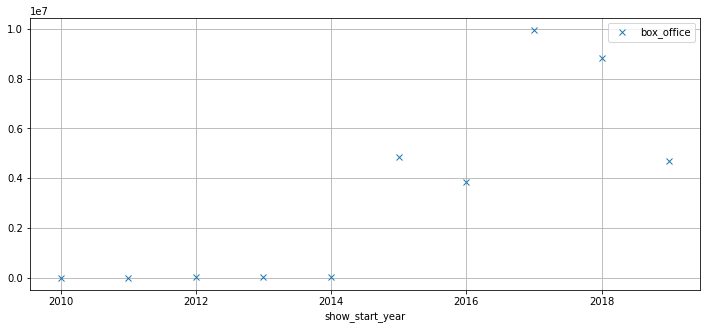

In [47]:
box_office_med['median'].plot(grid=True, style='x', figsize=(12, 5));

Если обратить внимание на среднее и медианное значение сборов, то можно отметить, что на сборы на один фильм имели максимальное значение в 2017 году, минимально в 2010. После 2017 года наблюдается тенденция к уменьшению суммы сборов на один фильм.

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.

In [48]:
df_age_raiting = df[df['show_start_year'] > 2014].pivot_table(index=['show_start_year', 'age_restriction'], 
                                                              values='box_office', aggfunc='sum')

df_age_raiting

box_office
show_start_year age_restriction                                     
2015            «0+» - для любой зрительской аудитории  3.790546e+08
                «12+» - для детей старше 12 лет         1.341951e+10
                «16+» - для детей старше 16 лет         1.078080e+10
                «18+» - запрещено для детей             5.428921e+09
                «6+» - для детей старше 6 лет           7.988245e+09
2016            «0+» - для любой зрительской аудитории  1.502288e+08
                «12+» - для детей старше 12 лет         1.115076e+10
                «16+» - для детей старше 16 лет         1.659417e+10
                «18+» - запрещено для детей             6.790637e+09
                «6+» - для детей старше 6 лет           1.205315e+10
2017            «0+» - для любой зрительской аудитории  2.295989e+08
                «12+» - для детей старше 12 лет         7.851390e+09
                «16+» - для детей старше 16 лет         1.869459e+10
                «18+» - запрещено для детей             9.651496e+09
                «6+» - для детей старше 6 лет           1.203103e+10
2018            «0+» - для любой зрительской аудитории  3.244900e+07
                «12+» - для детей старше 12 лет         1.426729e+10
                «16+» - для детей старше 16 лет         1.627841e+10
                «18+» - запрещено для детей             8.758498e+09
                «6+» - для детей старше 6 лет           9.913759e+09
2019            «0+» - для любой зрительской аудитории  1.774607e+07
                «12+» - для детей старше 12 лет         1.268020e+10
                «16+» - для детей старше 16 лет         1.274882e+10
                «18+» - запрещено для детей             1.012180e+10
                «6+» - для детей старше 6 лет           1.270491e+10

В 2015 больше всего денег собрали фильмы с возрастным ограничением 12+. В дальнейшем тенденция меняется и максимальное значение сборов у фильмов 16+. Это может происходить за счет переориентации прокатчиков на более платежесбособную аудиторию. Возможно поколение, которое привыкло и любит ходить в кино повзрослело и теперь может посещать фильмы категории 16+. Этот тезис подтвержает и увеличение сборов среди фильмов категории 18+.

Фильмы 18+ и 0+ традиционно имеют самые низкие сборы, т.к. прокатчики ориентированно на другие возрастные группы, к тому же категории 12+ и 16+ доступны более широкому кругу зрителей.

## Исследование фильмов, получивших государственную поддержку


Добавим колонку с суммой финансовой поддержки госудратсва. найдем это значение сложив показатели возвратных и невозвратных средств.

In [49]:
df['financing_source_sum'] = df['refundable_support'] + df['nonrefundable_support']

Создадим датасет, куда поместим фильмы, имеющие финансовую поддержку

In [50]:
df_financing_source = df[df['financing_source_sum'] > 0]

Проверим источник финансовой поддержки.

In [51]:
df_financing_source['financing_source'].unique()

array(['Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

- Сумма государственной поддержки

Найдем общую сумму гос. поддержки

In [52]:
df_financing_source ['financing_source_sum'].sum()

18794018847.0

Определим сумму поддержки в каждый год, а также медианное значение финансовой поддержки государства.

In [53]:
box_financing_source_year = df_financing_source.pivot_table(index='show_start_year', values='financing_source_sum', aggfunc=['sum', 'median'])
box_financing_source_year

,sum,median
,financing_source_sum,financing_source_sum
show_start_year,,
2013,1.343479e+08,67173972.5
2014,5.490023e+08,28000000.0
2015,3.212541e+09,30000000.0
2016,3.977155e+09,35000000.0
2017,3.098972e+09,40000000.0
2018,3.098000e+09,37500000.0
2019,4.724000e+09,40000000.0


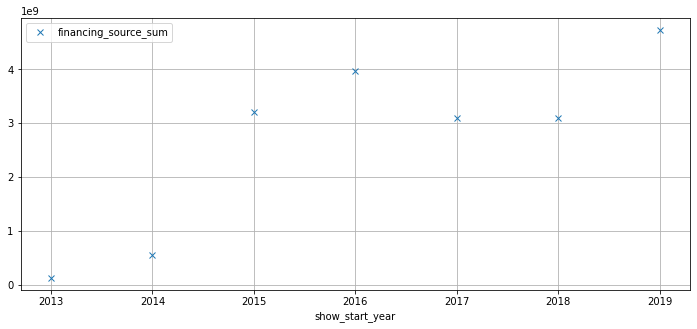

In [54]:
box_financing_source_year['sum'].plot(grid=True, style='x', figsize=(12, 5));

Общая сумма государственной поддержки начиная с 2015 года резко увеличилась, и сохранялась примерно на одном уровне. Первые годы (2013 и 2014) являлись для государства эксперементальными, слишком большие средства не выделялись. Можно предположить, что государство выделяло из бюджета определенную сумму и распределяло ее среди фильмов.

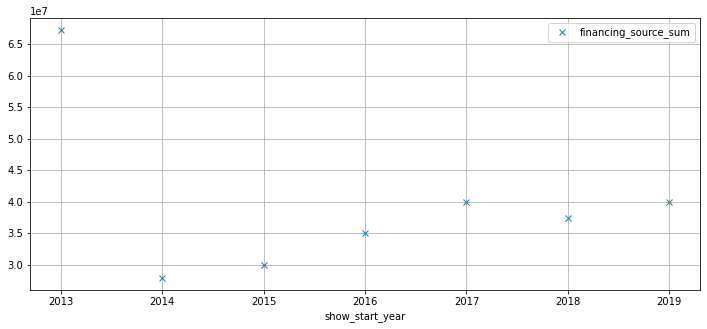

In [55]:
box_financing_source_year['median'].plot(grid=True, style='x', figsize=(12, 5));

Высокий показатель медианного значение в 2013 году означает, что первые деньги получило незначительное количество фильмов, в последствии число фильмов увеличилось, сохраняясь на определенном показателе.

- Окупаемость

In [56]:
fund_financing_source_year = df_financing_source.pivot_table(index='show_start_year', values='proportion_fund_source', aggfunc='median')
fund_financing_source_year

,proportion_fund_source
show_start_year,
2013,0.473197
2014,0.539407
2015,0.621419
2016,0.637013
2017,0.476990
2018,0.555546
2019,0.583233


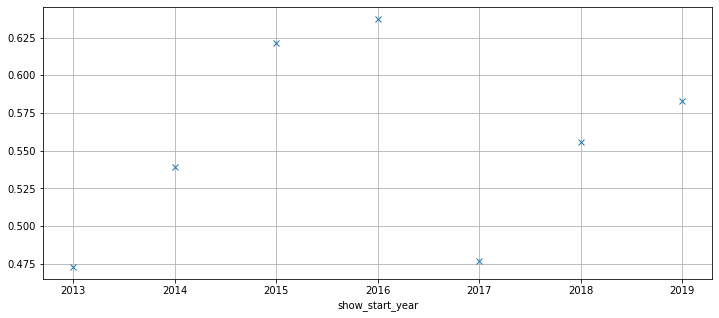

In [57]:
fund_financing_source_year['proportion_fund_source'].plot(grid=True, style='x', figsize=(12, 5));

Показатель окупаемости колеблется от 0.47 (в 2013) до 0.64 (в 2016). После относительно успешного 2016 года наблюдается резкое падение показателя окупаемости, возможно на фоне успешной тенденции, фонд стал выделять деньги на более рискованные проекты, но в последующем скорректировал свою политику. 

В целом показатель более 0.55 можно считать успешным, учитывая, что фонд выделяет деньги не только на потенциально коммерчески успешные картины, но и на фильмы обладающие вадным социальным значением, которым трудно найти финансирование и которые не рассчитаны на большие сборы, но несут важное культурное значение, например авторское кино.

- Рейтинг

In [58]:
df_raiting = df_financing_source.loc[df.loc[:,'ratings'] > 0]
raiting_financing_source_year = df_raiting.pivot_table(index='show_start_year', values='ratings', aggfunc=['median', 'max', 'min'])
raiting_financing_source_year

,median,max,min
,ratings,ratings,ratings
show_start_year,,,
2013,6.70,8.1,5.3
2014,6.35,6.9,3.8
2015,6.20,8.5,2.8
2016,5.90,8.5,1.0
2017,6.20,8.0,2.9
2018,6.30,7.7,2.5
2019,6.15,8.2,3.2


Медианное значение рейтингов фильмов с гос. поддержкой находится на промежутке от 5.8 - 6.7. Среди картин есть как очень успешные, так и откровенно провальные.

## Общий вывод

Проведенный анализ основывается на данных, опубликованных на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

На первом этапе мы познакомились с датафреймами и объеденили их в один. Для этого мы преобразовали тип данных в столбце `puNumber`.

Далее мы провели преобработку данных:
- Преобразовали типы данных;
- Устранили пропуски;
- Удалили дубликаты;
- Преобразовали категориальные значение;
- Избавились от аномалий;
- Добавили новые столбцы, необходимые для дальнейшего анализа.

Провели исследовательский анализ данных:
- Изучили сколько фильмов выходила в прокат каждый год;
- Изучили как менялась динамика сборов, в зависимости от года;
- Определили как влиял возрастной рейтинг в каждый год.

В конце анализа мы изучили показатели фильмов, получивших государственную поддержку:

- Сумму поддержки фонда;
- Окупаемость фильмов;
- Рейтинг фильмов.

Можно отметить, что наибольшее количество фильмов выходило в прокат в 2019 году. В 2017 году наблюдалось некоторое падение количества фильмов выходивших в прокат, но в целом тренд направлен на увеличение. 

Начиная с 2015 года происходит резкое увеличение сборов. Максимальное значение наблюдается в 2018 году, минимальное в 2010.

Если обратить внимание на среднее и медианное значение сборов, то можно отметить, что на сборы на один фильм имели максимальное значение в 2017 году, минимально в 2010. После 2017 года наблюдается тенденция к уменьшению суммы сборов на один фильм.

В 2015 больше всего денег собрали фильмы с возрастным ограничением 12+. В дальнейшем тенденция меняется и максимальное значение сборов у фильмов 16+. Это может происходить за счет переориентации прокатчиков на более платежесбособную аудиторию. Возможно поколение, которое привыкло и любит ходить в кино повзрослело и теперь может посещать фильмы категории 16+. Этот тезис подтвержает и увеличение сборов среди фильмов категории 18+.
Фильмы 18+ и 0+ традиционно имеют самые низкие сборы, т.к. прокатчики ориентированно на другие возрастные группы, к тому же категории 12+ и 16+ доступны более широкому кругу зрителей.

Рассмотрев картины с гос. поддержкой, можно сделать следующие выводы:

Общая сумма государственной поддержки начиная с 2015 года резко увеличилась, и сохранялась примерно на одном уровне. Первые годы (2013 и 2014) являлись для государства эксперементальными, слишком большие средства не выделялись. Можно предположить, что государство выделяло из бюджета определенную сумму и распределяло ее среди фильмов.

Высокий показатель медианного значение в 2013 году означает, что первые деньги получило незначительное количество фильмов, в последствии число фильмов увеличилось, сохраняясь на определенном показателе.

Показатель окупаемости колеблется от 0.47 (в 2013) до 0.64 (в 2016). После относительно успешного 2016 года наблюдается резкое падение показателя окупаемости, возможно на фоне успешной тенденции, фонд стал выделять деньги на более рискованные проекты, но в последующем скорректировал свою политику.

В целом показатель более 0.55 можно считать успешным, учитывая, что фонд выделяет деньги не только на потенциально коммерчески успешные картины, но и на фильмы обладающие вадным социальным значением, которым трудно найти финансирование и которые не рассчитаны на большие сборы, но несут важное культурное значение, например авторское кино.